In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

from pywtk.wtk_api import get_nc_data_from_url
WTK_URL = "https://h2oq9ul559.execute-api.us-west-2.amazonaws.com/dev"

attributes = ["power", "wind_direction", "wind_speed", "temperature",
                      "pressure","density"]
leap_day = False
utc = True
start = pandas.Timestamp('2013-01-01', tz='utc')
end = pandas.Timestamp('2013-01-07', tz='utc')
wind_data = get_nc_data_from_url(WTK_URL+"/met", "102445", start, end, attributes=attributes, leap_day=leap_day, utc=utc)

In [2]:
wind_data.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-01 00:05:00+00:00',
               '2013-01-01 00:10:00+00:00', '2013-01-01 00:15:00+00:00',
               '2013-01-01 00:20:00+00:00', '2013-01-01 00:25:00+00:00',
               '2013-01-01 00:30:00+00:00', '2013-01-01 00:35:00+00:00',
               '2013-01-01 00:40:00+00:00', '2013-01-01 00:45:00+00:00',
               ...
               '2013-01-06 23:15:00+00:00', '2013-01-06 23:20:00+00:00',
               '2013-01-06 23:25:00+00:00', '2013-01-06 23:30:00+00:00',
               '2013-01-06 23:35:00+00:00', '2013-01-06 23:40:00+00:00',
               '2013-01-06 23:45:00+00:00', '2013-01-06 23:50:00+00:00',
               '2013-01-06 23:55:00+00:00', '2013-01-07 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name=u'datetime', length=1729, freq=None)

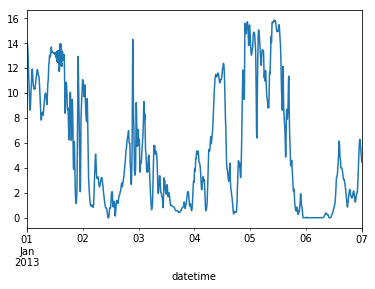

In [3]:
%matplotlib inline
wind_data['2013-01-01':'2013-01-31']['power'].plot()

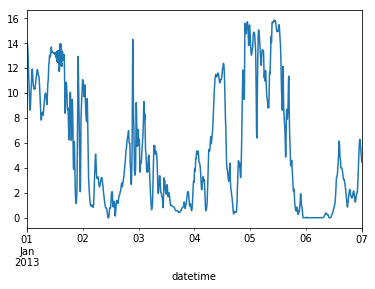

In [4]:
wind_data['power'].plot()

In [5]:
wind_data.head()

,power,wind_direction,wind_speed,temperature,pressure,density
datetime,,,,,,
2013-01-01 00:00:00+00:00,13.500253,244.508514,11.725340,274.073151,101289.406250,1.271938
2013-01-01 00:05:00+00:00,13.792985,244.398636,11.911388,274.097382,101282.085938,1.271547
2013-01-01 00:10:00+00:00,13.868511,244.475525,11.960098,274.121765,101276.593750,1.271223
2013-01-01 00:15:00+00:00,13.838138,244.623749,11.941663,274.146179,101274.765625,1.270985
2013-01-01 00:20:00+00:00,13.677173,244.782974,11.840858,274.155304,101267.437500,1.270710


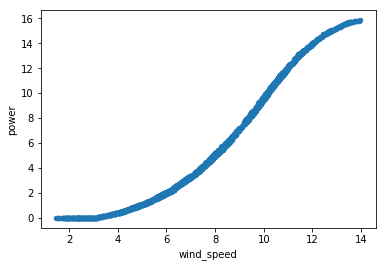

In [6]:
wind_data.plot(kind='scatter', x='wind_speed', y='power')

In [7]:
attributes = ["power", "wind_direction", "wind_speed", "temperature",
                      "pressure","density"]
attributes_hour = ["hour_ahead_power","hour_ahead_power_p90", "hour_ahead_power_p10"]
attributes_4_hour = ["4_hour_ahead_power","4_hour_ahead_power_p90", "4_hour_ahead_power_p10"]
attributes_6_hour = ["6_hour_ahead_power","6_hour_ahead_power_p90", "6_hour_ahead_power_p10"]
attributes_day = ["day_ahead_power","day_ahead_power_p90", "day_ahead_power_p10"]

leap_day = False
utc = True
start = pandas.Timestamp('2013-01-01', tz='utc')
end = pandas.Timestamp('2013-01-07', tz='utc')
data_hour = get_nc_data_from_url(WTK_URL+"/fcst", "102445", start, end, attributes=attributes_hour, leap_day=leap_day, utc=utc)
data_4_hour = get_nc_data_from_url(WTK_URL+"/fcst", "102445", start, end, attributes=attributes_4_hour, leap_day=leap_day, utc=utc)
data_6_hour = get_nc_data_from_url(WTK_URL+"/fcst", "102445", start, end, attributes=attributes_6_hour, leap_day=leap_day, utc=utc)
data_day = get_nc_data_from_url(WTK_URL+"/fcst", "102445", start, end, attributes=attributes_day, leap_day=leap_day, utc=utc)


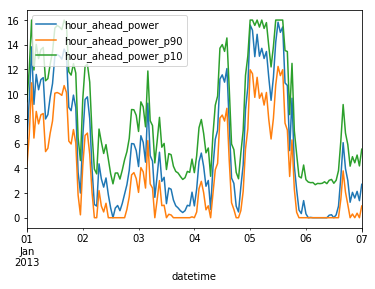

In [8]:
data_hour.plot()

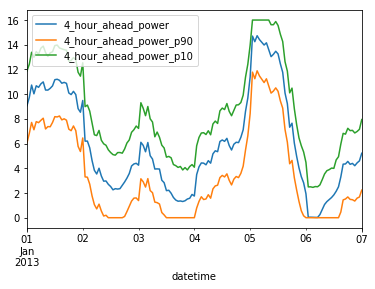

In [9]:
data_4_hour.plot()

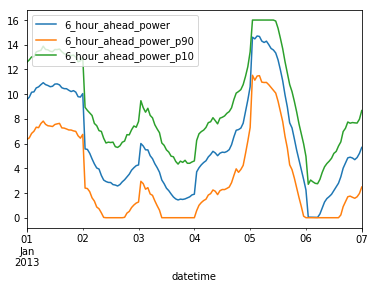

In [10]:
data_6_hour.plot()

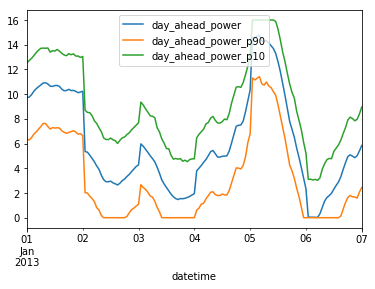

In [11]:
data_day.plot()

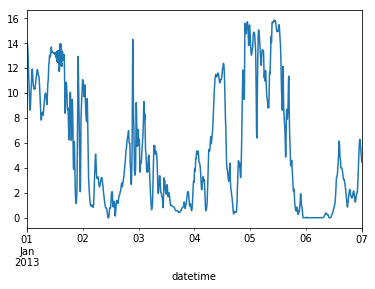

In [12]:
wind_data["power"].plot()

In [13]:
#combined=wind_data['power']
tmp_1 = data_hour['hour_ahead_power'].resample('5min').mean().bfill()
tmp_4 = data_4_hour['4_hour_ahead_power'].resample('5min').mean().bfill()
tmp_6 = data_6_hour['6_hour_ahead_power'].resample('5min').mean().bfill()
tmp_24 = data_day['day_ahead_power'].resample('5min').mean().bfill()
combined = pandas.concat([wind_data['power'], tmp_1, tmp_4, tmp_6, tmp_24], axis=1)

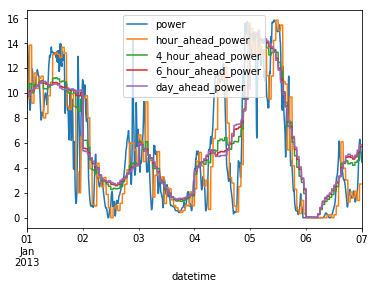

In [14]:
combined.plot()
